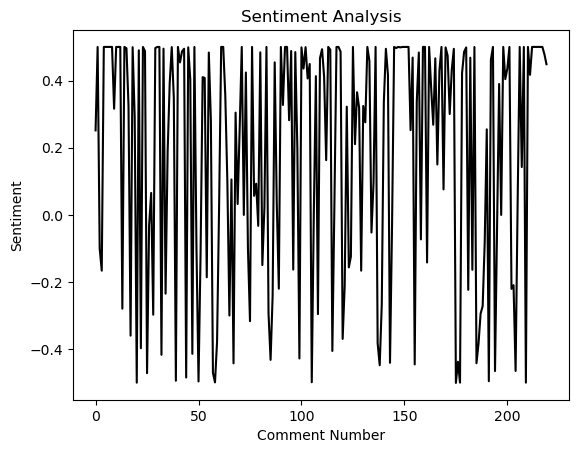

In [1]:
# -*- coding: utf-8 -*-
from snownlp import SnowNLP  # Import SnowNLP, a library for sentiment analysis in Chinese
import pandas as pd         # Import pandas for data handling
import matplotlib.pyplot as plt  # Import matplotlib for plotting
import numpy as np          # Import numpy for numerical operations
import os                   # Import os for file path handling

# Define the relative path to the CSV file containing comments
file_path = os.path.join('data', 'sample.csv')

# Read the CSV file with comments; ensure the encoding matches your file
data = pd.read_csv(file_path, encoding='utf-8')

# Initialize an empty list to store sentiment scores for each comment
sentiment_scores = []

# Process each comment in the 'review' column of the data
for comment in data['review']:
    s = SnowNLP(comment)             # Convert comment text to a SnowNLP object
    sentiment_score = s.sentiments   # Get the sentiment score (0 to 1 scale) for the comment
    sentiment_scores.append(sentiment_score)  # Store the score in the list

# Adjust the sentiment scores to be in the range [-0.5, 0.5]
# This shifts the 0–1 range down by 0.5, centering it around zero for easier interpretation
adjusted_scores = [score - 0.5 for score in sentiment_scores]

# Now, plot the sentiment scores to visualize the distribution of sentiments across comments
plt.plot(np.arange(len(adjusted_scores)), adjusted_scores, 'k-')  # Plot as a black line
plt.xlabel('Comment Number')  # Label the x-axis to show each comment in sequence
plt.ylabel('Sentiment')       # Label the y-axis to represent sentiment value
plt.title('Sentiment Analysis')  # Title the plot to indicate it’s a sentiment analysis
plt.show()  # Display the plot


In [11]:
# -*- coding: utf-8 -*-
from snownlp import SnowNLP  # Import SnowNLP for sentiment analysis on Chinese text
import pandas as pd         # Import pandas for data handling
import os                   # Import os for file path manipulation

# Define the relative path to the CSV file containing comments
file_path = os.path.join('data', 'sample.csv')

# Read the data from the CSV file; ensure the encoding matches your file
data = pd.read_csv(file_path, encoding='utf-8')

# Define a function to calculate sentiment score and handle any empty or exceptional content
def get_sentiment(text):
    try:
        if pd.isna(text) or text.strip() == "":  # Check for empty or blank content
            return None  # Alternatively, you could use return 0 as a default value
        s = SnowNLP(text)
        return s.sentiments  # Keep the score in the 0 to 1 range
    except Exception as e:
        print(f"Error processing text: {text}, Error: {e}")
        return None  # Alternatively, you could use return 0 for errors

# Create a new column for sentiment scores
data['sentiment'] = data['review'].apply(get_sentiment)

# Move the sentiment score column to be the first column
data = data[['sentiment'] + [col for col in data.columns if col != 'sentiment']]

# Save the result in the same directory with a new file name
output_file_path = os.path.join('data', 'Comments_with_sentiment.csv')
data.to_csv(output_file_path, encoding='utf-8', index=False)

print(f"File has been saved to: {output_file_path}")


File has been saved to: C:\Users\ruiji\Downloads\Comments_with_sentiment.csv
